In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd

In [36]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [52]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [54]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [55]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [56]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [57]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# print(last_date)


# to get the last 12 months of data, last date - 365
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)

#print(last_year)

# Perform a query to retrieve the data and precipitation scores
last_year_prcp = (session
                        .query(Measurement.date, Measurement.prcp)
                        .filter(Measurement.date > last_year)
                        .order_by(Measurement.date)
                        .all())


# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_prcp_df = pd.DataFrame(last_year_prcp, columns=["Date", "Precipitation"])

last_year_prcp_df["Date"] = pd.to_datetime(last_year_prcp_df["Date"])

# Sort the dataframe by date
last_year_prcp_df.sort_values(by=['Date'], inplace=True, ascending=False)
last_year_prcp_df.set_index(last_year_prcp_df["Date"], inplace = True)
last_year_prcp_df.head()

,Date,Precipitation
Date,,
2017-08-23,2017-08-23,0.45
2017-08-23,2017-08-23,0.08
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00
2017-08-22,2017-08-22,0.50


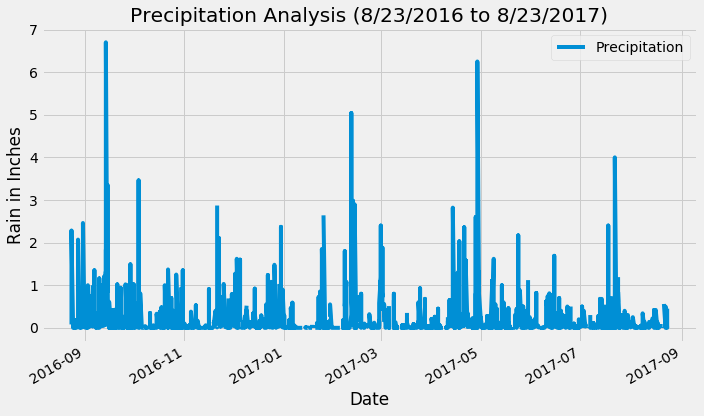

<Figure size 432x288 with 0 Axes>

In [80]:
last_year_prcp_df.plot('Date','Precipitation',figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/23/2016 to 8/23/2017)")
plt.legend(["Precipitation"])
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig("Images/1_precipitation.jpg")

In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lastyear_prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [73]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.id)).all()
stations

[(9)]

In [74]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
active_stations_val =active_stations[0] 
active_stations_val

('USC00519281', 2772)

In [76]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
all_observations = session.query(Measurement.station,func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == active_stations_val[0]).all()
all_observations

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [77]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_stations_val =active_stations[0] 
active_stations_val

active_stations_temps= session.query(Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-23").\
                       filter(Measurement.station == "USC00519281").all()
active_stations_temps
len(active_stations_temps)

all_temps= [z[0] for z in active_stations_temps]
all_temps

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

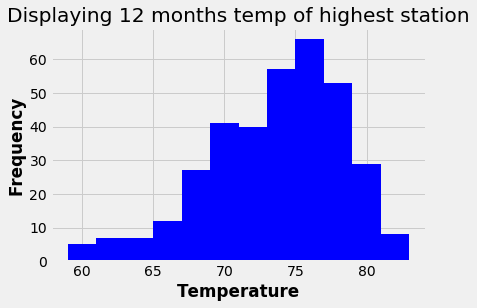

In [78]:
plt.hist(all_temps, bins=12, color="blue")
plt.title("Displaying 12 months temp of highest station")
labels = ['tobs']
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')

plt.savefig("Images/2_Temperature_observation.jpg")